# Practical 4A - Neural Network from Scratch 

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Creating the Base Layer

In [3]:
# creating the base layer

class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass

### Creating the Dense Layer

In [4]:
# creating the Dense layer

import numpy as np

class Layer_Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size,input_size)
        self.biases = np.random.randn(output_size,1)
        

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input ) + self.biases

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient,self.input.T )
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.biases -=learning_rate * output_gradient
        return input_gradient

### Creating the Activation Layer

In [5]:
# creating the activation layer

class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

### Creating the Activation Function

In [6]:
# creating the activation functions

# Linear function
class Linear(Activation):
    def __init__(self):
        def linear(x):
            return x
        
        def linear_prime(x):
            return 1
        
        super().__init__(linear, linear_prime)

# Tanh function
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)
        
        def tanh_prime(x):
            return 1 - np.tanh(x)**2
        
        super().__init__(tanh, tanh_prime)

# Sigmoid function
class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        
        def sigmoid_prime(x):
            return sigmoid(x) * (1 - sigmoid(x))
        
        super().__init__(sigmoid, sigmoid_prime)

# ReLU function
class ReLU(Activation):
    def __init__(self):
        def relu(x):
            return np.maximum(0,x)
        
        def relu_prime(x):
            return np.where(x > 0, 1, 0)
        
        super().__init__(relu, relu_prime)



### Creating the Loss Function

In [7]:
# creating the loss function

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

# creating the loss function derivative

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

### Creating the function to train and predict

In [8]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

def train(network, loss, loss_prime,x_train, y_train, epochs=10, learning_rate=0.1):
    for e in range (epochs):
        error = 0
        for x,y in zip(x_train, y_train):
            output = predict(network, x)
            error += loss(y, output)
            output_gradient = loss_prime(y, output)
            for layer in reversed(network):
                output_gradient = layer.backward(output_gradient, learning_rate)

        error  /=len(x_train)

        if verbose:
            print("Epoch: %d, Error: %.3f" % (e, error))
     

### Creating the Neural Network

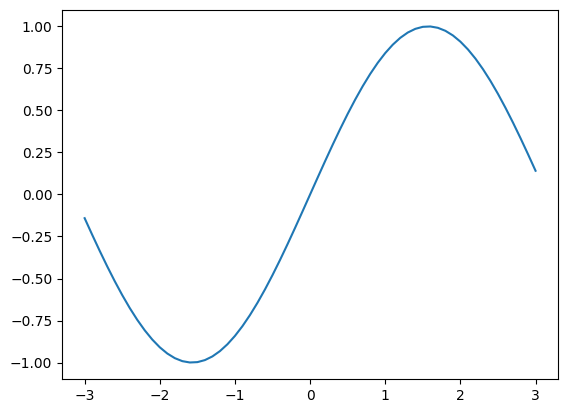

In [9]:
# sinx function
X = np.linspace (-3,3,61)
Y = np.sin(X)

plt.plot(X,Y)
plt.show()

In [18]:

# creating the neural network

X = np.linspace(-3,3,61)
Y = np.sin (X)

network = [ 
    Layer_Dense(1, 10),
    Tanh(),
    Layer_Dense(10, 1),
    Linear()
]

epochs = 10000
learning_rate = 0.1
verbose = True

train(network, mse, mse_prime, X, Y, epochs, learning_rate)


Epoch: 0, Error: 1.749
Epoch: 1, Error: 0.173
Epoch: 2, Error: 0.054
Epoch: 3, Error: 0.083
Epoch: 4, Error: 0.095
Epoch: 5, Error: 0.089
Epoch: 6, Error: 0.081
Epoch: 7, Error: 0.073
Epoch: 8, Error: 0.061
Epoch: 9, Error: 0.048
Epoch: 10, Error: 0.036
Epoch: 11, Error: 0.027
Epoch: 12, Error: 0.019
Epoch: 13, Error: 0.014
Epoch: 14, Error: 0.011
Epoch: 15, Error: 0.009
Epoch: 16, Error: 0.009
Epoch: 17, Error: 0.009
Epoch: 18, Error: 0.010
Epoch: 19, Error: 0.012
Epoch: 20, Error: 0.014
Epoch: 21, Error: 0.018
Epoch: 22, Error: 0.022
Epoch: 23, Error: 0.026
Epoch: 24, Error: 0.030
Epoch: 25, Error: 0.034
Epoch: 26, Error: 0.038
Epoch: 27, Error: 0.041
Epoch: 28, Error: 0.043
Epoch: 29, Error: 0.044
Epoch: 30, Error: 0.044
Epoch: 31, Error: 0.044
Epoch: 32, Error: 0.042
Epoch: 33, Error: 0.040
Epoch: 34, Error: 0.038
Epoch: 35, Error: 0.035
Epoch: 36, Error: 0.033
Epoch: 37, Error: 0.031
Epoch: 38, Error: 0.028
Epoch: 39, Error: 0.027
Epoch: 40, Error: 0.025
Epoch: 41, Error: 0.024
Ep

### Testing the Neural Network

In [22]:

input_arr = np.linspace(-3,3,61)
output_arr = np.sin (X)
predicted_arr = np.array([])

for x, y in zip(input_arr, output_arr):
    output = x
    for layer in network:
        output = layer.forward(output)
    predicted_arr = np.append(predicted_arr,output)


print ("Input\t Actual Output\t Predicted Output")
print ("_____________________________________________")
for i in range (len (input_arr)):
    print (input_arr[i],"\t    ",output_arr[i],"\t",predicted_arr[i])
    print ("----------------------------------------------------")

Input	 Actual Output	 Predicted Output
_____________________________________________
-3.0 	     -0.1411200080598672 	 -0.15442208946170544
----------------------------------------------------
-2.9 	     -0.23924932921398243 	 -0.24167016751601156
----------------------------------------------------
-2.8 	     -0.3349881501559051 	 -0.33150187425070926
----------------------------------------------------
-2.7 	     -0.4273798802338298 	 -0.4218937959248623
----------------------------------------------------
-2.6 	     -0.5155013718214642 	 -0.5107009205529184
----------------------------------------------------
-2.5 	     -0.5984721441039564 	 -0.5958320638808581
----------------------------------------------------
-2.4 	     -0.675463180551151 	 -0.675407522717389
----------------------------------------------------
-2.3 	     -0.7457052121767203 	 -0.7478713009101583
----------------------------------------------------
-2.2 	     -0.8084964038195901 	 -0.8120445715305742
------------

### Plotting the Output

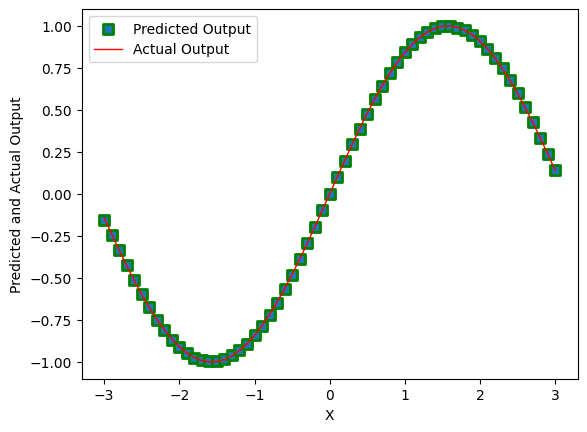

In [25]:
# Plotted the predicted output and actual output

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3,61)
plt.scatter(x, predicted_arr, 
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
 
plt.plot(x, output_arr,c='red', linewidth = 1)
 
plt.xlabel("X")
plt.ylabel("Predicted and Actual Output")
plt.legend(["Predicted Output", "Actual Output"])
plt.show()
